In [1]:
from etl import read_csv
import pandas as pd
import json
import seaborn as sns

In [5]:
data = read_csv()
json_data = json.loads(data)
spotify_df = pd.json_normalize(data=json_data)

In [7]:
spotify_df.drop("Unnamed: 0", axis=1, inplace=True)
spotify_df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


### Identificar los tipos de datos

In [4]:
spotify_df.dtypes

year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner           int64
dtype: object

###  ¿Cuales son las dimensiones del Dataset?

In [5]:
spotify_df.shape

(4810, 10)

### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [6]:
(
    spotify_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

workers         2190
artist          1840
img             1367
nominee            6
year               0
title              0
published_at       0
updated_at         0
category           0
winner             0
dtype: int64

### Revisamos si tenemos duplicados y en caso de que si, cuantos son?

In [7]:
duplicados_por_columna = spotify_df.duplicated()
duplicados_por_columna.sum()

0

### ¿Cuál es la proporción de valores nulos por cada variable? 

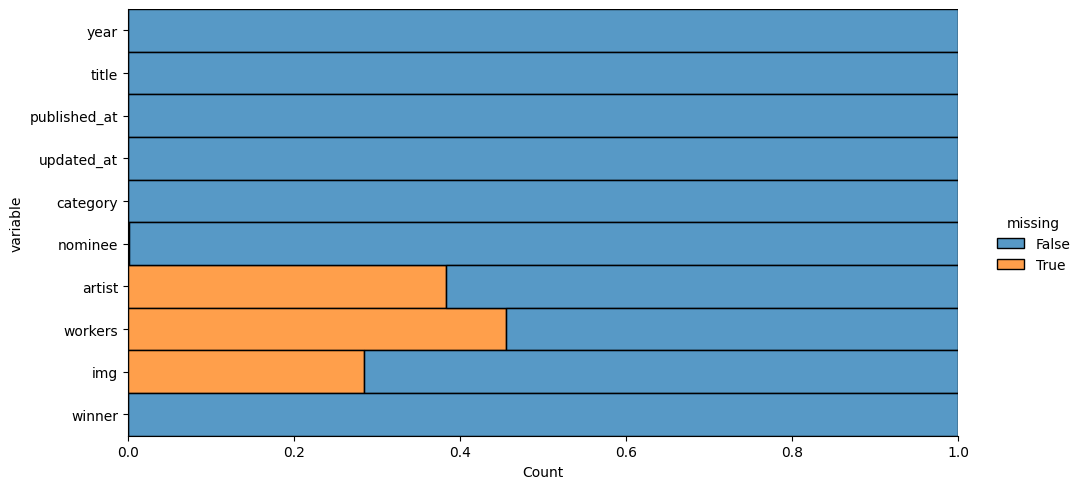

In [8]:
(
    spotify_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## Proceso de Limpieza

### Eliminar las columnas que no son necesarias para el workshop

### Realizamos el Merge

In [16]:
df = spotify_df.merge(grammys_df, how='left', left_on='track_name', right_on='nominee')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,grammy_nominated,nominee,artist,is_nominee
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.000001,0.3580,0.715,87.917,4,acoustic,NaN,NaN,NaN,NaN
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.000006,0.1010,0.267,77.489,4,acoustic,NaN,NaN,NaN,NaN
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.000000,0.1170,0.120,76.332,4,acoustic,NaN,NaN,NaN,NaN
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.000071,0.1320,0.143,181.740,3,acoustic,NaN,NaN,NaN,NaN
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.000000,0.0829,0.167,119.949,4,acoustic,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114794,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0.976000,0.1050,0.035,85.239,4,world-music,NaN,NaN,NaN,NaN
114795,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0.000000,0.0839,0.743,132.378,4,world-music,NaN,NaN,NaN,NaN
114796,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,0.000000,0.2700,0.413,135.960,4,world-music,Best Reggae Album,Friends,Sly And Robbie,1.0
114797,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,0.000000,0.2700,0.413,135.960,4,world-music,"Best Jazz Instrumental Performance, Group",Friends,Chick Corea,1.0


### Revisamos los tipos de datos y vemos si estan correctamente asignados

In [17]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
grammy_nominated     object
nominee              object
artist               object
is_nominee          float64
dtype: object

### Ajusto los tipo de datos

In [18]:
string_columns = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre',
                   'grammy_nominated', 'nominee', 'artist']
df[string_columns] = df[string_columns].astype(str)

### Lleno los valores faltantes de las columnas que vienen de los grammys

In [19]:
df['is_nominee'] = df['is_nominee'].fillna(0)
df['grammy_nominated'] = df['grammy_nominated'].fillna('no nominated')
df['nominee'] = df['nominee'].fillna('no nominated')
df['artist'] = df['artist'].fillna('no nominated')
df.head(2)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,grammy_nominated,nominee,artist,is_nominee
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0.000001,0.358,0.715,87.917,4,acoustic,nan,nan,nan,0.0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,0.000006,0.101,0.267,77.489,4,acoustic,nan,nan,nan,0.0
